In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision as tv

device = torch.device('cuda:0' if torch.cuda.is_available else 'cpu')
print(device)

num_workers = os.cpu_count()
print(num_workers)

plt.ion()  # interactive mode

cuda:0
6


In [2]:
dataset_dir = os.path.join('.', 'dataset_root')
print(f'Path directory: {dataset_dir}')
batch_size = 128

Path directory: ./dataset_root


In [3]:
def get_mean_std(dataloader, c=1):
    ''' Computes mean and standard deviation from a dataloader (training set 
    is prefered),
    '''
    n = len(dataloader.dataset)
    print(f'# of samples = {n}')
    mean = torch.zeros(c)
    std = torch.zeros(c)

    for bx, _ in dataloader_mnist_train:
        b, c, h, w = bx.size()  # last batch has fewer images
        bx = bx.view(b, c, -1)
        mean += bx.mean(2).sum(0)
        std += bx.std(2).sum(0)

    mean = (mean / n).numpy()
    std = (std / n).numpy()
    return mean, std

In [9]:
def imshow(tensor_grid, mean=0., std=1., title=None):
    assert len(tensor_grid.size()) == 4, \
        f'For a batch of images only, {tensor_grid.size()} '
    
    tensor_grid = tv.utils.make_grid(tensor_grid)
    grid = tensor_grid.numpy().transpose((1,2,0))
    grid = std * grid + mean
    grid = np.clip(grid, 0, 1)
    plt.imshow(grid)
    
    if title is not None:
        plt.title(title)
        
    plt.pause(0.001)

In [5]:
dataset_mnist_train = tv.datasets.MNIST(
    root=dataset_dir, 
    train= True,
    download=True,    
    transform=tv.transforms.Compose([
        tv.transforms.ToTensor(),
    ]))

dataloader_mnist_train = torch.utils.data.DataLoader(
    dataset_mnist_train,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers)

n_train = len(dataloader_mnist_train.dataset)
print(n_train)

60000


In [6]:
mean, std = get_mean_std(dataloader_mnist_train, 1)
print(mean, std)
print('batch size' , next(iter(dataloader_mnist_train))[0].size())

# of samples = 60000
[0.13066049] [0.30150452]
batch size torch.Size([128, 1, 28, 28])


In [7]:
dataset_mnist_train = tv.datasets.MNIST(
    root=dataset_dir, 
    train=True,
    download=True,    
    transform=tv.transforms.Compose([
        tv.transforms.ToTensor(),
        tv.transforms.Normalize(mean, std)
    ]))

dataloader_mnist_train = torch.utils.data.DataLoader(
    dataset_mnist_train,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers)
    

dataset_mnist_test = tv.datasets.MNIST(
    root=dataset_dir,
    train=False,
    download=True,    
    transform=tv.transforms.Compose([
        tv.transforms.ToTensor(),
        tv.transforms.Normalize(mean, std)
    ]))
dataloader_mnist_test = torch.utils.data.DataLoader(
    dataset_mnist_test,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers)

n_train = len(dataloader_mnist_train.dataset)
n_test = len(dataloader_mnist_test.dataset)
print(f'Train = {n_train}, Test = {n_test}')

Train = 60000, Test = 10000


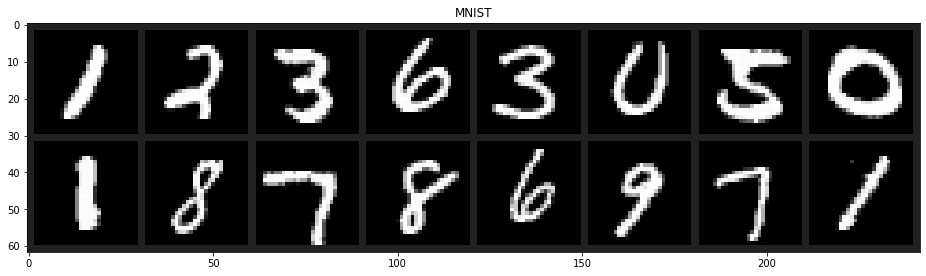

In [13]:
images = next(iter(dataloader_mnist_train))[0]
plt.figure(figsize=[16,8])
# imshow(images[:16], mean=mean, std=std, title='MNIST')
imshow(images[:16], mean=mean, std=std, title='MNIST')
plt.show()